In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import operator
import numpy as np
import seaborn as sns

bprp_bounds=[0.453,0.36,0.82,0.97,1.59,1.86,2.386,1.5,1.226,1.14,0.453]
gmag_bounds=[21,20.182,19.936,19.172,17.059,16.381,16.867,17.936,19.218,21,21]

In [2]:
def weightedMean(x,xerr): #Takes lists of a value and a values uncertainty, returns 2 variables: the weighted mean, and the mean's uncertainty
    topfrac=0
    botfrac=0
    for i in range(len(x)):
        topfrac+=x[i]/(xerr[i]**2)
        botfrac+=1/(xerr[i]**2)
    mean=topfrac/botfrac
    mean_unc=np.sqrt(1/botfrac)
    return mean,mean_unc

In [3]:
def chiSquare(x,xerr,xmean): #Takes 2 lists and one value, the first list of values, the second list of the values uncertainties, and the third value is the mean value of the data set. Returns the chi squared value of that data set
    xchi=0
    for i in range(len(x)):
        xchi+=((x[i]-xmean)/xerr[i])**2
    return xchi

In [4]:
carinasurvey="3timesrhalflight.csv" #The gaia data file with the survey of carina

#quartertimesrhalflight.csv
#half_times_rhalflight.csv
#1timesrhalflight.csv
#2timesrhalflight.csv
#3timesrhalflight.csv

#SELECT TOP 2000000 ra,ra_error,dec,dec_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error FROM gaiadr2.gaia_source  WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',100.40291666666667,-50.96611111111111,0.03916666666666667))=1    AND  (phot_bp_mean_mag>=15 AND phot_rp_mean_mag>=15 AND phot_g_mean_mag>=15 AND parallax<=2*parallax_error

In [5]:
dfgaia=pd.read_csv(carinasurvey) #The Gaia data

gaiara=dfgaia["ra"].values.tolist() #gaia ra list
gaiara_error=dfgaia["ra_error"].values.tolist() #gaia ra error list
gaiadec=dfgaia["dec"].values.tolist() #gaia dec list
gaiadec_error=dfgaia["dec_error"].values.tolist() #gaia dec error list
gaiapmra=dfgaia["pmra"].values.tolist() #gaia pmra list
gaiapmra_error=dfgaia["pmra_error"].values.tolist() #gaia pmra error list
gaiapmdec=dfgaia["pmdec"].values.tolist() #gaia pmdec list
gaiapmdec_error=dfgaia["pmdec_error"].values.tolist() #gaia pmdec error list
gaia_gmag=dfgaia["phot_g_mean_mag"].values.tolist() #gaia g mean mag list
gaia_bmag=dfgaia["phot_bp_mean_mag"].values.tolist() #gaia b mean mag list
gaia_rmag=dfgaia["phot_rp_mean_mag"].values.tolist() #gaia r mean mag list
gaia_bminr=dfgaia["bp_rp"].values.tolist() #gaia b-r mag values
gaia_bming=dfgaia["bp_g"].values.tolist() #gaia b-g mag values
gaia_rv=dfgaia["radial_velocity"].values.tolist() #gaia radial velocity values
gaia_rv_err=dfgaia["radial_velocity_error"].values.tolist() #gaia radial velocity error values
gaia_gminr=dfgaia["g_rp"].values.tolist() #gaia g-r mag values

In [6]:
#appending to lists only pmra and pmdec that are within 2sigma of the measured pmra and pmdec values

teampmra=0.495 #gaia team values for carina
teampmra_error=0.015
teampmdec=0.143
teampmdec_error=0.014

pmra_error_quad=[] #pmra error lists with the gaia error added in quadrature
pmdec_error_quad=[] #pmdec error lists with the gaia error added in quadrature

for i in range(len(gaiapmra)): #Appending the gaia team pmra and pmdec to lists
    pmra_error_quad.append(np.sqrt((gaiapmra_error[i])**2+(teampmra_error)**2))
    pmdec_error_quad.append(np.sqrt(gaiapmdec_error[i]**2+teampmdec_error**2))

#2 sigma limitation

sigpmra=[]
sigpmdec=[]
sigpmra_error=[]
sigpmdec_error=[]
sig_gminr=[]
sig_gmag=[]
sig_bminr=[]

signum=0.5

for i in range(len(pmra_error_quad)):
    if gaiapmra[i]+signum*pmra_error_quad[i]>=teampmra and gaiapmra[i]-signum*pmra_error_quad[i]<=teampmra: #pmra check
        if gaiapmdec[i]+signum*pmdec_error_quad[i]>=teampmdec and gaiapmdec[i]-signum*pmdec_error_quad[i]<=teampmdec: #pmdec check
            sigpmra.append(gaiapmra[i])
            sigpmdec.append(gaiapmdec[i])
            sigpmra_error.append(gaiapmra_error[i])
            sigpmdec_error.append(gaiapmdec_error[i])
            sig_gminr.append(gaia_gminr[i])
            sig_gmag.append(gaia_gmag[i])
            sig_bminr.append(gaia_bminr[i])

In [7]:

# y is gmag, x is bp-rp
#01 eq'n: y=8.7957x+17.0155
#12 eq'n: y=20.3745-0.534783x
#23 eq'n: y=24.1125-5.09333x
#34 eq'n: y=22.4778-3.40806x
#45 eq'n: y=21.0517-2.51111x
#56 eq'n: y=0.923954x+14.6624
#67 eq'n: y=19.7458-1.20655x
#78 eq'n: y=24.9542-4.67883x
#89 eq'n: y=44.6219-20.7209x
#90 eq'n: y=21

branch_bp_rp=[]
branch_gmag=[]
nonbranch_bp_rp=[]
nonbranch_gmag=[]

count=0

for i in range(len(gaia_bminr)):
    if gaia_bminr[i]>=bprp_bounds[1] and gaia_bminr[i]<bprp_bounds[0] and gaia_gmag[i]<=8.7957*gaia_bminr[i]+17.0155 and gaia_gmag[i]>=20.3745-0.534783*gaia_bminr[i]: #Polygon 1
        count+=1
        branch_bp_rp.append(gaia_bminr[i])
        branch_gmag.append(gaia_gmag[i])
    elif gaia_bminr[i]>=bprp_bounds[0] and gaia_bminr[i]<bprp_bounds[2] and gaia_gmag[i]<=21 and gaia_gmag[i]>=20.3745-0.534783*gaia_bminr[i]: #Polygon 2
        count+=1
        branch_bp_rp.append(gaia_bminr[i])
        branch_gmag.append(gaia_gmag[i])
    elif gaia_bminr[i]>=bprp_bounds[2] and gaia_bminr[i]<bprp_bounds[3] and gaia_gmag[i]<=21 and gaia_gmag[i]>=24.1125-5.09333*gaia_bminr[i]: #Polygon 3
        count+=1
        branch_bp_rp.append(gaia_bminr[i])
        branch_gmag.append(gaia_gmag[i])
    elif gaia_bminr[i]>=bprp_bounds[3] and gaia_bminr[i]<bprp_bounds[9] and gaia_gmag[i]<=21 and gaia_gmag[i]>=22.4778-3.40806*gaia_bminr[i]: #Polygon 4
        count+=1
        branch_bp_rp.append(gaia_bminr[i])
        branch_gmag.append(gaia_gmag[i])
    elif gaia_bminr[i]>=bprp_bounds[9] and gaia_bminr[i]<bprp_bounds[8] and gaia_gmag[i]<=44.6219-20.7209*gaia_bminr[i] and gaia_gmag[i]>=22.4778-3.40806*gaia_bminr[i]: #Polygon 5
        count+=1
        branch_bp_rp.append(gaia_bminr[i])
        branch_gmag.append(gaia_gmag[i])
    elif gaia_bminr[i]>=bprp_bounds[8] and gaia_bminr[i]<bprp_bounds[7] and gaia_gmag[i]<=24.9542-4.67883*gaia_bminr[i] and gaia_gmag[i]>=22.4778-3.40806*gaia_bminr[i]: #Polygon 6
        count+=1
        branch_bp_rp.append(gaia_bminr[i])
        branch_gmag.append(gaia_gmag[i])
    elif gaia_bminr[i]>=bprp_bounds[7] and gaia_bminr[i]<bprp_bounds[4] and gaia_gmag[i]<=19.7458-1.20655*gaia_bminr[i] and gaia_gmag[i]>=22.4778-3.40806*gaia_bminr[i]: #Polygon 7
        count+=1
        branch_bp_rp.append(gaia_bminr[i])
        branch_gmag.append(gaia_gmag[i])
    elif gaia_bminr[i]>=bprp_bounds[4] and gaia_bminr[i]<bprp_bounds[5] and gaia_gmag[i]<=19.7458-1.20655*gaia_bminr[i] and gaia_gmag[i]>=21.0517-2.51111*gaia_bminr[i]: #Polygon 8
        count+=1
        branch_bp_rp.append(gaia_bminr[i])
        branch_gmag.append(gaia_gmag[i])
    elif gaia_bminr[i]>=bprp_bounds[5] and gaia_bminr[i]<bprp_bounds[6] and gaia_gmag[i]<=19.7458-1.20655*gaia_bminr[i] and gaia_gmag[i]>=0.923954*gaia_bminr[i]+14.6624: #Polygon 9
        count+=1
        branch_bp_rp.append(gaia_bminr[i])
        branch_gmag.append(gaia_gmag[i])
    else:
        nonbranch_bp_rp.append(gaia_bminr[i])
        nonbranch_gmag.append(gaia_gmag[i])

In [8]:
branchmember_ra=[]
branchmember_dec=[]
branchmember_ra_error=[]
branchmember_dec_error=[]
branchmember_pmra=[]
branchmember_pmra_error=[]
branchmember_pmdec=[]
branchmember_pmdec_error=[]
branchmember_gmag=[]
branchmember_bmag=[]
branchmember_rmag=[]
branchmember_bminr=[]
branchmember_bming=[]
branchmember_gminr=[]

for i in range(len(gaia_bminr)): #Appending branch stars to lists with data on them 
    for j in range(len(branch_bp_rp)):
        if gaia_bminr[i]==branch_bp_rp[j] and gaia_gmag[i]==branch_gmag[j]:
            branchmember_ra.append(gaiara[i])
            branchmember_dec.append(gaiadec[i])
            branchmember_ra_error.append(gaiara_error[i])
            branchmember_dec_error.append(gaiadec_error[i])
            branchmember_pmra.append(gaiapmra[i])
            branchmember_pmra_error.append(gaiapmra_error[i])
            branchmember_pmdec.append(gaiapmdec[i])
            branchmember_pmdec_error.append(gaiapmdec_error[i])
            branchmember_gmag.append(gaia_gmag[i])
            branchmember_bmag.append(gaia_bmag[i])
            branchmember_rmag.append(gaia_rmag[i])
            branchmember_bminr.append(gaia_bminr[i])
            branchmember_bming.append(gaia_bming[i])
            branchmember_gminr.append(gaia_gminr[i])

In [9]:
#Appending errors in quadrature
branchmember_pmra_error_quad=[]
branchmember_pmdec_error_quad=[]

for i in range(len(branchmember_pmra_error)):
    branchmember_pmra_error_quad.append(np.sqrt((branchmember_pmra_error[i])**2+teampmra_error**2))
    branchmember_pmdec_error_quad.append(np.sqrt((branchmember_pmdec_error[i])**2+teampmdec_error**2))

In [10]:

#Lists to be filled with data from stars that are within the drawn branch, and are within the sigma cut

sigbranchmember_ra=[]
sigbranchmember_dec=[]
sigbranchmember_ra_error=[]
sigbranchmember_dec_error=[]
sigbranchmember_pmra=[]
sigbranchmember_pmra_error=[]
sigbranchmember_pmdec=[]
sigbranchmember_pmdec_error=[]
sigbranchmember_gmag=[]
sigbranchmember_bmag=[]
sigbranchmember_rmag=[]
sigbranchmember_bminr=[]
sigbranchmember_bming=[]
sigbranchmember_gminr=[]

branchsignum=3

beforecount=len(branchmember_ra)

count=0

maglimit=eval(input("What magnitude limit do you want to impose? (Enter a number)"))

# Added a gmagnitude cut of gmag<=19.1, as described in gaia dr2 collab paper

for i in range(len(branchmember_pmra)):
    if branchmember_pmra[i]+branchsignum*branchmember_pmra_error_quad[i]>=teampmra and branchmember_pmra[i]-branchsignum*branchmember_pmra_error_quad[i]<=teampmra and branchmember_pmdec[i]+branchsignum*branchmember_pmdec_error_quad[i]>=teampmdec and branchmember_pmdec[i]-branchsignum*branchmember_pmdec_error_quad[i]<=teampmdec and branchmember_gmag[i]<=maglimit: #Checking pmra, then pmdec and 
        sigbranchmember_ra.append(branchmember_ra[i])
        sigbranchmember_dec.append(branchmember_dec[i])
        sigbranchmember_ra_error.append(branchmember_ra_error[i])
        sigbranchmember_dec_error.append(branchmember_dec_error[i])
        sigbranchmember_pmra.append(branchmember_pmra[i])
        sigbranchmember_pmra_error.append(branchmember_pmra_error_quad[i])
        sigbranchmember_pmdec.append(branchmember_pmdec[i])
        sigbranchmember_pmdec_error.append(branchmember_pmdec_error_quad[i])
        sigbranchmember_gmag.append(branchmember_gmag[i])
        sigbranchmember_bmag.append(branchmember_bmag[i])
        sigbranchmember_rmag.append(branchmember_rmag[i])
        sigbranchmember_bminr.append(branchmember_bminr[i])
        sigbranchmember_bming.append(branchmember_bming[i])
        sigbranchmember_gminr.append(branchmember_gminr[i])
        count+=1

print(count, len(branchmember_pmra))

What magnitude limit do you want to impose? (Enter a number)19.1
224 2774


In [11]:
# Calculating weighted mean averages

sigbranch_pmramean,sigbranch_pmramean_error=weightedMean(sigbranchmember_pmra,sigbranchmember_pmra_error)
sigbranch_pmdecmean,sigbranch_pmdecmean_error=weightedMean(sigbranchmember_pmdec,sigbranchmember_pmdec_error)

print("PMRA Weighted mean:",sigbranch_pmramean)
print("PMRA Weighted mean error:",sigbranch_pmramean_error,"\n")
print("PM-Dec Weighted mean:",sigbranch_pmdecmean)
print("PM-Dec Weighted mean error:",sigbranch_pmdecmean_error)

PMRA Weighted mean: 0.494739616846067
PMRA Weighted mean error: 0.01676180353643758 

PM-Dec Weighted mean: 0.12814266174558567
PM-Dec Weighted mean error: 0.015336413037197837


In [12]:
pmrachi=chiSquare(sigbranchmember_pmra,sigbranchmember_pmra_error,sigbranch_pmramean)
pmdecchi=chiSquare(sigbranchmember_pmdec,sigbranchmember_pmdec_error,sigbranch_pmdecmean)

print("n-1 d.o.f.:",len(sigbranchmember_pmra)-1)

print("Chi Squared value for PM-RA:",pmrachi)
print("Chi Squared value for PM-Dec:",pmdecchi)


n-1 d.o.f.: 223
Chi Squared value for PM-RA: 243.04532481814135
Chi Squared value for PM-Dec: 226.53619264874635


In [13]:
binnum=50

ellipticity=0.33 #The ellipticity Taken from McConnachie paper

gaiateamra=100.4029166667 #RA from Gaia DR2 Paper 
gaiateamdec=-50.96611 #Dec from Gaia DR2 Paper 

rlist=[]

ellipsearealist=[]

semimajoraxis_size_list=[]
semiminoraxis_size_list=[]

angle=np.deg2rad(-12)

rotated_ra=[]
rotated_dec=[]

for i in range(len(sigbranchmember_ra)):

    ra_rotated=(sigbranchmember_ra[i]-gaiateamra)*np.cos(angle)-(sigbranchmember_dec[i]-gaiateamdec)*np.sin(angle)
    dec_rotated=(sigbranchmember_dec[i]-gaiateamdec)*np.cos(angle)+(sigbranchmember_ra[i]-gaiateamra)*np.sin(angle)

    rotated_ra.append(ra_rotated)
    rotated_dec.append(dec_rotated)

    a=np.sqrt((rotated_ra[i])**2+(rotated_dec[i])**2/(1-ellipticity**2)) # Using this equation, calculating a single semimajor axis
    semimajoraxis_size_list.append(a) #Appending that semimajor axis value to a list
    b=np.sqrt((1-ellipticity**2)*(rotated_ra[i])**2+(rotated_dec[i])**2) # Using this equation, calculating a single semiminor axis
    semiminoraxis_size_list.append(b)
    r=np.sqrt((rotated_ra[i])**2+(rotated_dec[i])**2) # Radius calculation
    rlist.append(r)
    area=(semimajoraxis_size_list[i]*semiminoraxis_size_list[i]*(np.pi)) # Area given the semimajor and semiminor axis
    ellipsearealist.append(area)

    #In this instance, i'm setting the mean ra and mean dec as (0,0)
    #This makes things easier, and all we're digging for here is semimajor axes and distance from te mean


In [42]:
# Creating a dictionary to sort by the area's

axisdict={}

for i in range(len(ellipsearealist)):
    axisdict[i]=semimajoraxis_size_list[i]

axis_sorted=sorted(axisdict.values())

index_sorted=[]

for i in range(len(semimajoraxis_size_list)):
    for j in range(len(axis_sorted)):
        if axis_sorted[i]==axisdict[j]:
            index_sorted.append(j) # Sorting the index values for using in the next for loop to append sorted semimajor axis values

area_sorted = []

for j in range(len(index_sorted)):
    area_sorted.append(ellipsearealist[index_sorted[j]])

starsperbinnum=4
raddensbinnum=int(len(ellipsearealist)/starsperbinnum)
densitylist=[]
semimajaxislist=[]

old_area=0

for i in range(raddensbinnum):
    semimajaxislist.append(axis_sorted[i*starsperbinnum+3])

    area=area_sorted[i*starsperbinnum+3]-old_area

    densitylist.append(starsperbinnum/area)

    old_area=area

In [23]:
'''
def allGraphs(gaia_gminr,gaia_gmag,gaiapmra,gaiapmdec,sig_gminr,sig_gmag,sigpmra,sigpmdec,sig_bminr,branch_bp_rp,branch_gmag,sigbranchmember_pmra,sigbranchmember_pmdec,sigbranch_pmramean,sigbranch_pmdecmean,sigbranch_pmdecmean_error,sigbranch_pmramean_error,sigbranchmember_ra,sigbranchmember_dec,rotated_ra,rotated_dec,semimajoraxis_size_list,binnum,ellipsearealist,semimajaxislist,densitylist):
    gminr_gmag_graph(gaia_gminr,gaia_gmag) #no cut
    propermotion_graph_all(gaiapmra,gaiapmdec) #no cut
    gminrvsgmag_sigcut(sig_gminr,sig_gmag) #sigma cut
    propermotion_sigcut(sigpmra,sigpmdec) #sigma cut 
    bminrvsgmag_sigcut_graph(sig_bminr,sig_gmag,bprp_bounds,gmag_bounds) #sigma cut
    bprpvsgmag_branch(branch_bp_rp,branch_gmag,nonbranch_bp_rp,nonbranch_gmag,bprp_bounds,gmag_bounds) #full cut 
    propermotion_withmean(sigbranchmember_pmra,sigbranchmember_pmdec,sigbranch_pmramean,sigbranch_pmdecmean,sigbranch_pmdecmean_error,sigbranch_pmramean_error) #full cut
    postcuts_positionplot(sigbranchmember_ra,sigbranchmember_dec) #full cut #
    numberdensity_position_plot(sigbranchmember_ra, sigbranchmember_dec) #stat plot
    numberdensity_propermotion_plot(sigbranchmember_pmra, sigbranchmember_pmdec) #stat plot
    rotated_positionplot(rotated_ra,rotated_dec) #full cut #
    semimajoraxis_histogram(semimajoraxis_size_list,binnum) #stat plot
    ellipsearea_histogram(ellipsearealist,binnum) #stat plot
    semimajaxis_densityplot(semimajaxislist,densitylist) #stat plot
'''

'\ndef allGraphs(gaia_gminr,gaia_gmag,gaiapmra,gaiapmdec,sig_gminr,sig_gmag,sigpmra,sigpmdec,sig_bminr,branch_bp_rp,branch_gmag,sigbranchmember_pmra,sigbranchmember_pmdec,sigbranch_pmramean,sigbranch_pmdecmean,sigbranch_pmdecmean_error,sigbranch_pmramean_error,sigbranchmember_ra,sigbranchmember_dec,rotated_ra,rotated_dec,semimajoraxis_size_list,binnum,ellipsearealist,semimajaxislist,densitylist):\n    gminr_gmag_graph(gaia_gminr,gaia_gmag) #no cut\n    propermotion_graph_all(gaiapmra,gaiapmdec) #no cut\n    gminrvsgmag_sigcut(sig_gminr,sig_gmag) #sigma cut\n    propermotion_sigcut(sigpmra,sigpmdec) #sigma cut \n    bminrvsgmag_sigcut_graph(sig_bminr,sig_gmag,bprp_bounds,gmag_bounds) #sigma cut\n    bprpvsgmag_branch(branch_bp_rp,branch_gmag,nonbranch_bp_rp,nonbranch_gmag,bprp_bounds,gmag_bounds) #full cut \n    propermotion_withmean(sigbranchmember_pmra,sigbranchmember_pmdec,sigbranch_pmramean,sigbranch_pmdecmean,sigbranch_pmdecmean_error,sigbranch_pmramean_error) #full cut\n    postcu

### Graphs

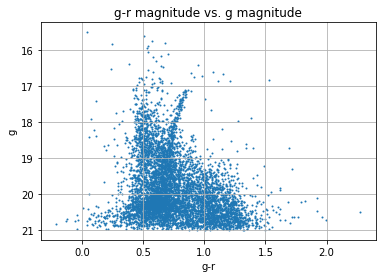

In [24]:
# gminr vs gaia gmag graph with no cut
plt.grid(True)

plt.scatter(gaia_gminr,gaia_gmag,s=1)

plt.xlabel("g-r")
plt.ylabel("g")

plt.ylim(plt.ylim()[::-1])


plt.title("g-r magnitude vs. g magnitude")

#plt.gca().set_aspect('equal', adjustable='box')

plt.savefig("bmingVSgmag.png",dpi=300)

plt.show()

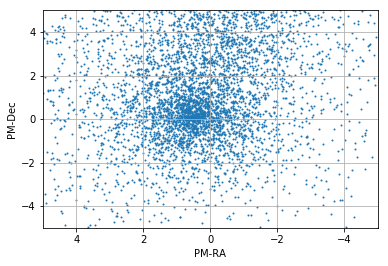

In [25]:
#proper motion diagram with no cut
plt.scatter(gaiapmra,gaiapmdec,s=1)

plt.grid(True)

plt.xlabel("PM-RA")
plt.ylabel("PM-Dec")

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.xlim(plt.xlim()[::-1])

plt.savefig("propermotiondiagram.png",dpi=300)

plt.show()

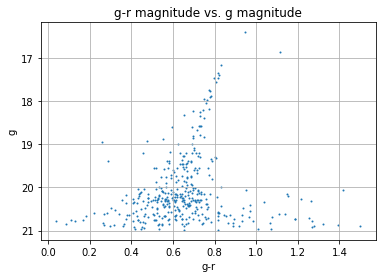

In [26]:
#gminr vs gmag diagram with only a sigma cut

plt.scatter(sig_gminr,sig_gmag,s=1)

plt.grid(True)

plt.xlabel("g-r")
plt.ylabel("g")

plt.ylim(plt.ylim()[::-1])

plt.title("g-r magnitude vs. g magnitude")

plt.savefig("bmingVSgmag_withsigcut.png",dpi=300)

plt.show()

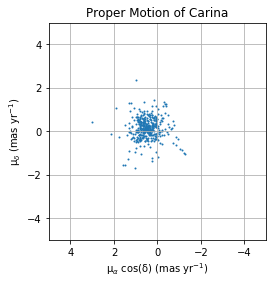

In [27]:
#proper motion diagram wit a sigma cut

plt.scatter(sigpmra,sigpmdec,s=1)

plt.grid(True)

plt.xlim(-5,5)
plt.ylim(-5,5)

plt.xlabel("μ$_α$ cos(δ) (mas yr$^{-1}$)")
plt.ylabel("μ$_δ$ (mas yr$^{-1}$)")
plt.title("Proper Motion of Carina")
plt.gca().set_aspect('equal', adjustable='box')

plt.xlim(plt.xlim()[::-1])

plt.savefig("propermotiondiagram_withsigcut.png",dpi=300)

plt.show()

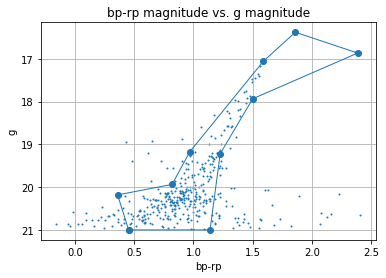

In [28]:
#bminr vs gmag diagram with only a sigma cut

plt.scatter(sig_bminr,sig_gmag,s=1)
plt.plot(bprp_bounds,gmag_bounds,"-o",linewidth=1)

plt.grid(True)

plt.xlabel("bp-rp")
plt.ylabel("g")

plt.ylim(plt.ylim()[::-1])

plt.title("bp-rp magnitude vs. g magnitude")

plt.savefig("bpminrpVSgmag_withsigcut.png",dpi=300)

plt.show()

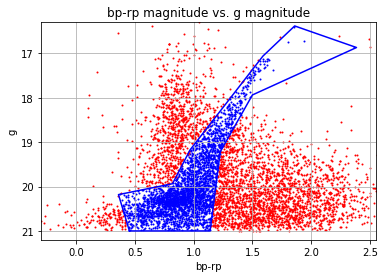

In [29]:
#bp-rp vs gmag diagram with both nonmembers and branch and sigma cut members included

plt.scatter(branch_bp_rp,branch_gmag,s=1,c="blue")
plt.scatter(nonbranch_bp_rp,nonbranch_gmag,s=1,c="red")
plt.plot(bprp_bounds,gmag_bounds,c="blue")

plt.grid(True)

plt.xlabel("bp-rp")
plt.ylabel("g")

plt.ylim(plt.ylim(16.3,21.2)[::-1])
plt.xlim(-0.3,2.55)

plt.title("bp-rp magnitude vs. g magnitude")

plt.savefig("bpminrpVSgmag_shapeselect.png",dpi=300)

plt.show()

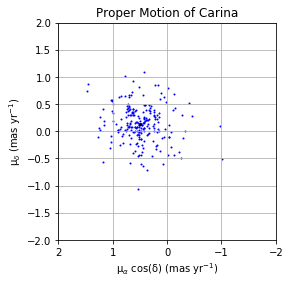

In [30]:
#proper motion plot with a sigma and branch cut

plt.scatter(sigbranchmember_pmra,sigbranchmember_pmdec,s=1,c="blue")
#     plt.errorbar(sigbranchmember_pmra,sigbranchmember_pmdec,sigbranchmember_pmdec_error,sigbranchmember_pmra_error,linestyle="none",capsize=1,capthick=1,elinewidth=1,c="blue")

plt.scatter(sigbranch_pmramean,sigbranch_pmdecmean,s=1,c="black")
plt.errorbar(sigbranch_pmramean,sigbranch_pmdecmean,sigbranch_pmdecmean_error,sigbranch_pmramean_error,linestyle="none",capsize=1,capthick=1,elinewidth=1,c="black")

plt.grid(True)

plt.xlabel("μ$_α$ cos(δ) (mas yr$^{-1}$)")
plt.ylabel("μ$_δ$ (mas yr$^{-1}$)")
plt.title("Proper Motion of Carina")
plt.gca().set_aspect('equal', adjustable='box')

sigbranch_graphlim=2

plt.xlim(-sigbranch_graphlim,sigbranch_graphlim)
plt.ylim(-sigbranch_graphlim,sigbranch_graphlim)

plt.xlim(plt.xlim()[::-1])

plt.savefig("propermotiondiagram_withsigandbranchcut.png",dpi=300)

plt.show()

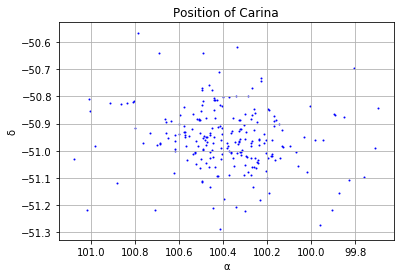

In [31]:
#position plots with a sigma and branch cut

plt.scatter(sigbranchmember_ra,sigbranchmember_dec,s=1,c="blue")

# plt.scatter(gaiateamra,gaiateamdec,c="black",s=1)

plt.grid(True)

plt.xlabel("α")
plt.ylabel("δ")
plt.title("Position of Carina")

plt.xlim(plt.xlim()[::-1])

plt.axis('tight')

plt.savefig("position_siggcutmembcut.png",dpi=300)

plt.show()

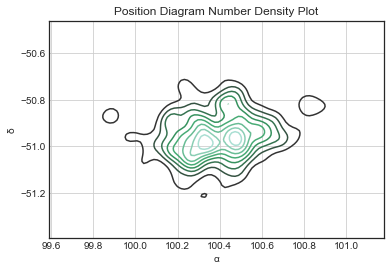

In [32]:
# Getting a number density plot of RA and Dec after branch and sigma cut

sns.set_style("white")
kdeplot_raVSdec=sns.kdeplot(sigbranchmember_ra, sigbranchmember_dec,bw=0.035,kernel="gau")

radecbin=kdeplot_raVSdec.get_figure()

plt.xlabel("α")
plt.ylabel("δ")
plt.title("Position Diagram Number Density Plot")

plt.grid(True)

# sns.jointplot(sigbranchmember_ra,sigbranchmember_dec,kind="kde")

plt.show()

radecbin.savefig("kde_plot_RAvsDec.png",dpi=300)

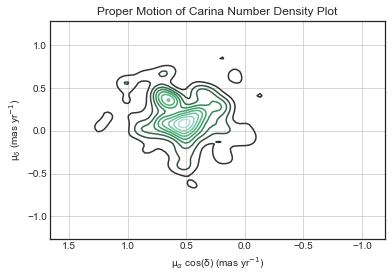

In [33]:
# Getting a number density plot of PM-RA and PM-Dec after a sigma and branch cut

sns.set_style("white")
kdeplot_pmraVSpmdec=sns.kdeplot(sigbranchmember_pmra, sigbranchmember_pmdec,bw=0.065,kernel="gau")

pmrapmdecbin=kdeplot_pmraVSpmdec.get_figure()

plt.xlabel("μ$_α$ cos(δ) (mas yr$^{-1}$)")
plt.ylabel("μ$_δ$ (mas yr$^{-1}$)")
plt.title("Proper Motion of Carina Number Density Plot")
# plt.gca().set_aspect('equal', adjustable='box')

plt.xlim(plt.xlim()[::-1])

plt.grid(True)

plt.show()

pmrapmdecbin.savefig("kde_plot_PMRAvsPMDec.png",dpi=300)

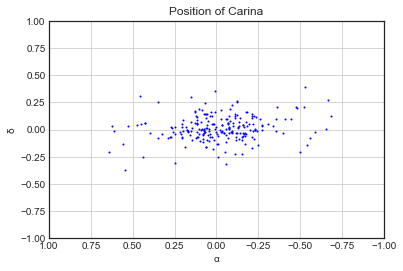

In [34]:
# rotated ra vs dec plot

plt.scatter(rotated_ra,rotated_dec,s=1, c="blue")

plt.xlim(-1,1)
plt.ylim(-1,1)

plt.grid(True)

plt.xlabel("α")
plt.ylabel("δ")
plt.title("Position of Carina")

plt.xlim(plt.xlim()[::-1])

#plt.axis('tight')

plt.show()

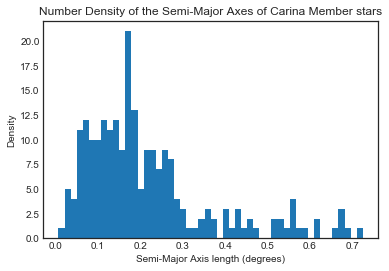

In [35]:
#histogram of semimajor axis length

plt.hist(semimajoraxis_size_list,bins=binnum)

plt.xlabel("Semi-Major Axis length (degrees)")
plt.ylabel("Density")
plt.title("Number Density of the Semi-Major Axes of Carina Member stars")

plt.savefig("histogram_of_axes_lengths.png",dpi=300)

plt.show()

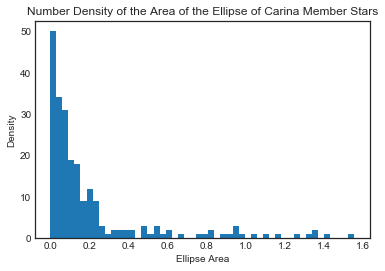

In [36]:
#histogram of ellipse area

plt.hist(ellipsearealist,bins=binnum)

plt.xlabel("Ellipse Area")
plt.ylabel("Density")
plt.title("Number Density of the Area of the Ellipse of Carina Member Stars")

plt.savefig("histogram_of_ellipse_areas.png",dpi=300)

plt.show()

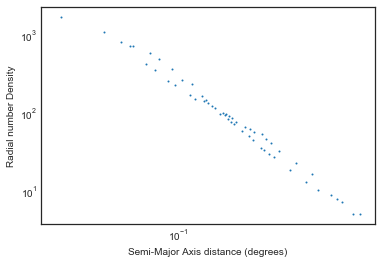

In [45]:
#density plot of semimajor axis size

plt.scatter(semimajaxislist,densitylist,s=1)

plt.xlabel("Semi-Major Axis distance (degrees)")
plt.ylabel("Radial number Density")

plt.semilogy(semimajaxislist[0],0)
plt.semilogx(semimajaxislist[0],0)

plt.savefig("Radial_surface_density_plot.png",dpi=300)

plt.show()

In [40]:
print(semimajaxislist,len(semimajaxislist))

[0.027871990703962443, 0.044735354696329804, 0.05360987185934328, 0.059165390300133285, 0.06085683045963958, 0.07057589392422725, 0.07335765445249179, 0.07771825100373933, 0.08075481722779153, 0.08901125145216086, 0.09379338556644218, 0.09698644382984543, 0.10404416513782806, 0.1135328670059983, 0.11657654974816614, 0.12017879918991618, 0.1294946205113163, 0.13193441061124467, 0.13571451640876897, 0.13821168500225972, 0.1447996258444312, 0.14951001430071786, 0.15804228846357474, 0.16373043251206384, 0.1657169205469234, 0.16768023473849494, 0.17219090608408233, 0.17349252933746664, 0.17792489900214983, 0.18055999228464903, 0.18332425234785507, 0.18832202953376206, 0.20002178153661054, 0.20751768501864976, 0.21621496605334928, 0.21892442891631225, 0.22516746425094017, 0.2291356877444719, 0.24631760698235672, 0.24899414148846477, 0.2532285006564026, 0.2607546745043745, 0.2692019775561349, 0.2755630425550264, 0.2831433967601134, 0.2989802573327423, 0.3373346112099839, 0.36163395046819247, 